# Probability & Statistics: II

*Davide Gerosa (Milano-Bicocca)*

##### Reading:

- [Ivezic textbook](https://press.princeton.edu/books/hardcover/9780691198309/statistics-data-mining-and-machine-learning-in-astronomy) Chapter 3. 


This course is based on previous work by many people. See [here]((https://github.com/dgerosa/astrostatistics_bicocca_2025/blob/main/README.md) for credits.


---

In [17]:
import numpy as np
import scipy.stats
import pylab as plt
plt.rcParams['figure.figsize'] = [8, 8]

## Monte Carlo integration

You might have seen this already, but Monte Carlo integration is an absolute crucial notion in modern statistics (modern because it relies on generating a large number of data points, which has been made possible by computers). Suppose you have very a complicated integral to solve and that you can write down the integrand as a product of $f(x)$ and $p(x)$ with $\int p(x)=1$ (this is not restrictive at all! See below). My nasty integral is

$$\int f(x) p(x) dx$$


Provided one can **evaluate** $f(x)$ and **sample** $p(x)$ (meaning that is a probability distribution and you can efficiently extract samples from it) , then


$$\int f(x) p(x) dx \approx \frac{1}{N}\sum_{i=1}^N f(x_i) $$

where $x_i$ are samples drawn from $p$.

This means: sample $p$, put the numbers in $f$ and average them

### An example.

Ok try to integrate this crazy thing. Pen and paper? Good luck.
    
$$\int_{0.3}^4 dx \frac{\exp(x) \sqrt{4x+3}  \log(x^6)}{\tanh(x)}$$

Pen and paper? Good luck. With a computer? Easy peasy!

First, I divide and multiply by $4-0.3$. This is because (see below) 1/(4-0.3) is the uniform distribution $p(x)$ for x between 0.3 and 4.

$$ (4-0.3) \times \int_{0.3}^{4} \frac{dx}{(4-0.3)} \frac{\exp(x) \sqrt{4x+3} * \log(x^6)}{\tanh(x)}$$

Now I have $p(x)=\frac{1}{4-0.3}$ and $f(x) = \frac{\exp(x) \sqrt{4x+3} * \log(x^6)}{\tanh(x)}$. All I need to do is generate numbers from $p$, put them into $f$, and average the results.

In [18]:
xmax= 4
xmin=0.3

xi=np.random.uniform(xmin,xmax, 100000)

def fun(x):
    return np.exp(x)*(4*x+3)**0.5 * np.log(x**6)/np.tanh(x)

integral = (xmax-xmin) * np.mean(fun(xi))

integral


1391.8565919983891

Check the result:
https://www.wolframalpha.com/input/?i=integrate+from+0.3+to+4+exp%28x%29+sqrt%284x%2B3%29+*+ln%28x%5E6%29+%2Ftanh%28x%29

Run the cell again. And again.  We'll understand the errors in a bit. The errors scale as square root of the number of samples

#### Always remember Monte Carlo integration, it's extremely useful!

## Descriptive statistics 
Remind that we said that we can collect many numbers and we often want to condense this information into fewer numbers to describe the phenomenon that we see: these are called descriptive statistics.

As we've said, our goal is to estimate $h(x)$ given some measured data, allowing us to reconstruct the data-based distribution $f(x)$. An arbitrary distribution can be characterized by **location** parameters (i.e., position that is where the distribution is centered for example), **scale** parameters (i.e., width of the distribution), and **shape** parameters. These parameters are called ***descriptive statistics***.

The distribution we're trying to characterize could be anything, e.g. (from my field) the distribution of masses of binary black-hole systems as discovered by gravitational-wave detectors. We really don't know the answer to this well, and the problem is made more complicated by things like detector selection effects (heavier systems are more likely to be observed), and blurring effects from measurement precision.

Let's get back to the distribution we've seen already

C:\anaconda3\Lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


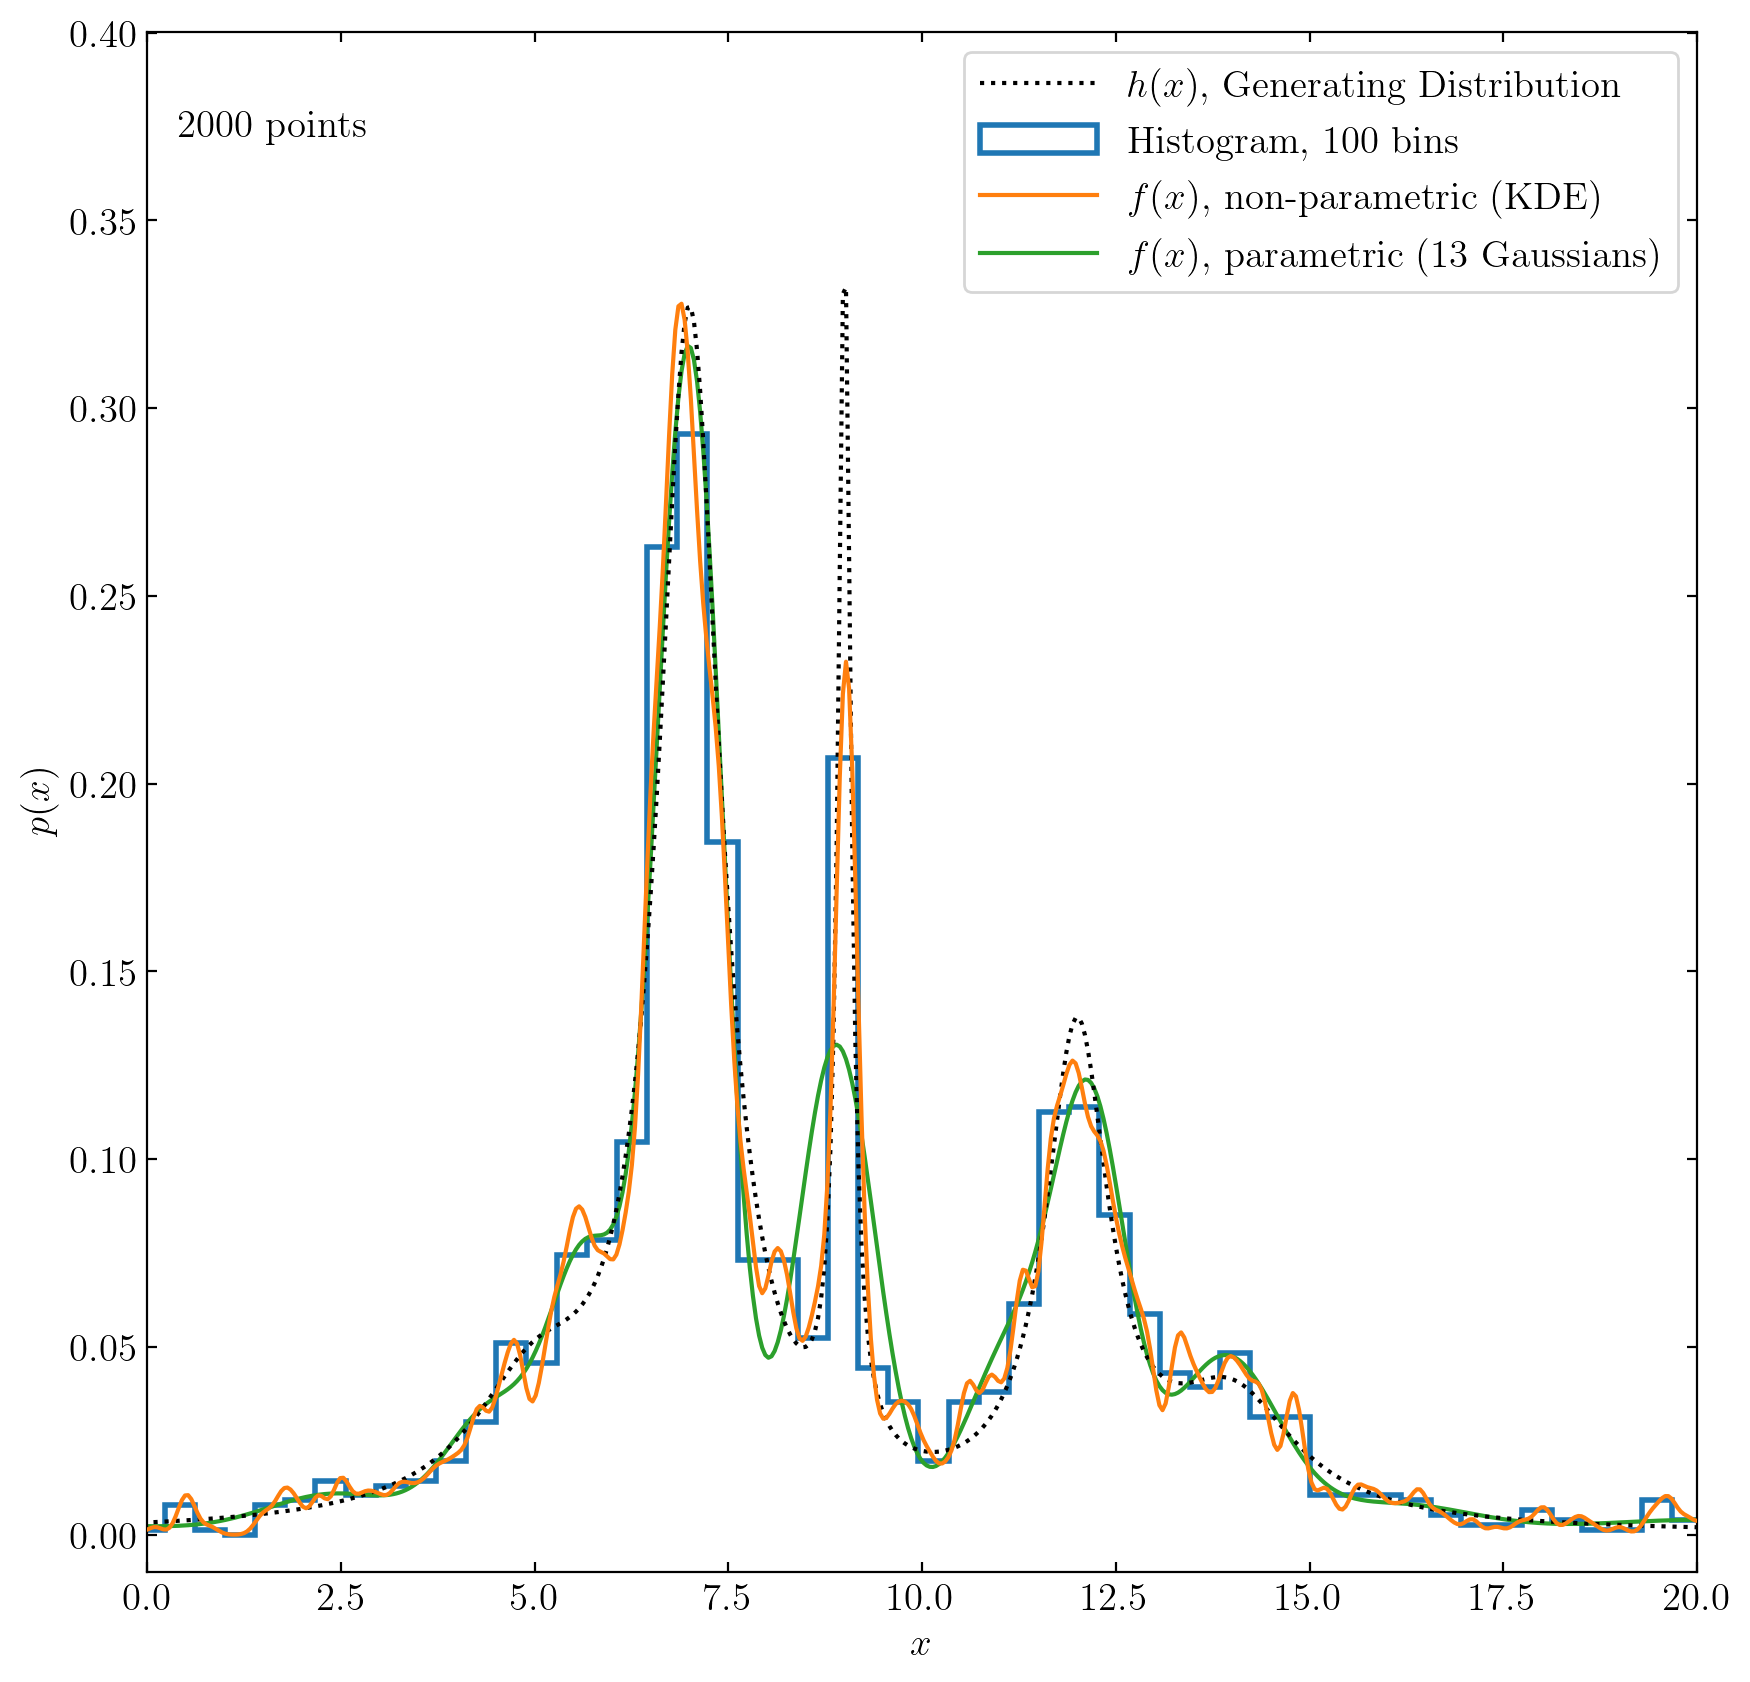

In [1]:
# Based on Ivezic v2, Figure 6.8; edited by G. T. Richards, S. R. Taylor, and D. Gerosa

# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.neighbors import KernelDensity

from astropy.visualization import hist
from sklearn.mixture import GaussianMixture

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina' # very useful command for high-res images

#------------------------------------------------------------
# Generate our data: a mix of several Cauchy distributions
# In reality nature generates data for you


random_state = np.random.RandomState(seed=0)
N = 2000 # number of data points
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
hx = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x)
                          for (mu, gamma, f) in mu_gamma_f])
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N), random_state=random_state)
                    for (mu, gamma, f) in mu_gamma_f])
random_state.shuffle(x)
x = x[x > -10]
x = x[x < 30]


#------------------------------------------------------------
# plot the results
fig,ax = plt.subplots(figsize=(10, 10))
xgrid = np.linspace(-10, 30, 1000)

# True distribution: you typically don't have it! Only have the samples!
if True:
    ax.plot(xgrid, hx(xgrid), ':', color='black', zorder=3,
            label="$h(x)$, Generating Distribution")

# A simple histogram
# But try changing the number of bins!
if True:
    ax.hist(x,density=True,color='C0',bins=100,histtype='step',lw=2, label='Histogram, 100 bins')

# Something more sophisticated: Kernel Density Estimation
# But try changing the bandwith! 
if True:
    kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
    kde.fit(x[:, None])
    dens_kde = np.exp(kde.score_samples(xgrid[:, None]))
    ax.plot(xgrid, dens_kde, '-', color='C1', zorder=3,
            label="$f(x)$, non-parametric (KDE)")

# Use Gaussian Mixtures with a pre-defined number of clusters (13)
if True:
    gmm = GaussianMixture(n_components=13).fit(x.reshape(-1, 1))
    logprob = gmm.score_samples(xgrid.reshape(-1, 1))
    fx = lambda j : np.exp(gmm.score_samples(j.reshape(-1, 1)))
    ax.plot(xgrid, fx(np.array(xgrid)), '-', color='C2',
            label="$f(x)$, parametric (13 Gaussians)")

# Plot cosmetics
ax.text(0.02, 0.95, "%i points" % N, ha='left', va='top',
            transform=ax.transAxes)

ax.set_ylabel('$p(x)$',fontsize=14)
ax.legend(loc='upper right')

ax.set_xlabel('$x$',fontsize=14)
ax.set_xlim(0, 20)
ax.set_ylim(-0.01, 0.4001)

plt.show()

We all know that a good measurement for the **location** is the **mean** of a sample: 

$$\bar{x} = \frac{1}{N}\sum_{i=1}^N x_i$$ 

This is actually known as the **sample arithmetic mean**, and derives from *Monte Carlo integration* to get the first moment of the distribution, i.e. 

$$\mu = E(x) = \langle x \rangle = \int_{-\infty}^{\infty} x h(x)\,dx \approx \frac{1}{N}\sum_{i=1}^N x_i $$

where $\{x_i\}$ are random samples from the properly normalized PDF $h(x)$, and $E(\cdot)$ means the **expectation value**.

To *Monte Carlo integrate*, you should extract numbers from $h(x)$ and drop them into $f(x)$ which in this case is just $x$. So, the **true arithmetic mean** is $\mu$ but we approximate it by Monte Carlo integration to get the **sample arithmetic mean** $\bar{x}$.

Computing the mean is straightforward:

In [20]:
data =x.copy()
mean = np.mean(data)
print(mean)

8.79491032639886


While it's most common to compute the mean, it may surprise you to learn that some distributions do not have formally calculable means (integration gives infinity). In these and other cases, the **median** is a more *robust* estimator of the (true) mean location of the distribution.  That's because it is less affected by **outliers**. The median represents that point of the distribution that divides the samples in half.

To understand the previous statement, think about multiplying all numbers above the 50th percentile (i.e. the median) by 100, or even just replacing them with larger numbers. The mean would be strongly affected by these corrupted points, but **cumulative statistics based on the ordering of samples would remain unaffected by the outlier corruption**. This makes the median a robust estimator for the **location** of the distribution in the sense that is less sensible to outliers.

In [21]:
median = np.median(data)
median

7.752731764708434

In [22]:
# Try to unpack what is happening here
median = np.median(data)

mask = data > 20
data2 = data.copy()
data2[mask] = 10000

newmedian = np.median(data2)
newmean = np.mean(data2)

print(median, newmedian)
print(mean, newmean)

7.752731764708434 7.752731764708434
8.79491032639886 125.63017483107997


Let's now talk about the **shape** that is the spread around the mean/median. Other descriptive statistics are related to higher order moments of the distribution. Beyond the "average" *location* value, we'd like to know something about **deviations** from the average (which is related to the *shape* of the distribution).  The simplest thing to compute is $$d_i = x_i - \mu.$$  However, the average deviation is zero by definition of the mean.  The next simplest thing to do is to compute the **mean absolute deviation (MAD)**:

$$\frac{1}{N}\sum|x_i-\mu|,$$

but the absolute values can hide the true scatter of the distribution [(example)](http://www.mathsisfun.com/data/standard-deviation.html). But this is used, see regularization schemes further on in the class. So the next simplest thing to do is to square the differences $$\sigma^2 = \frac{1}{N}\sum(x_i-\mu)^2,$$ which we call the **variance**.

The *variance* $V$ is the just expectation value of $(x-\mu)^2$ (and related to both the 1st and the 2nd moment of the distribution)

$$\sigma^2 = V = E((x-\mu)^2) = \int_{-\infty}^{\infty}  (x-\mu)^2 h(x) dx,$$

where $\sigma$ is the **standard deviation**. Again, the integral gets replaced by a sum for discrete distributions. While most familiar for Gaussian distributions, you can compute the variance even if your distribution is not Gaussian.  

In [23]:
var = np.var(data)
std = np.std(data)
print(var, std)
print(np.isclose(std**2,var)) #Why am I not doing std**2==var?

15.026052739760294 3.876345281287555
True


There is also the **Median Absolute Deviation (also MAD)** given by

$${\rm median} (|x_i-{\rm median}(\{x_i\})|)$$

where $\sigma = 1.4826\,{\rm MAD}$ for a Gaussian distribution (but note that we aren't using a Gaussian distribution above).

In [24]:
from astropy.stats import median_absolute_deviation
MAD = median_absolute_deviation(data)
print(MAD,MAD*1.4826)

1.6811130664731344 2.492418232353069


Much like the mean is not a robust estimator for the location, the variance is not a robust estimator for the width of the distribution. That's why we often use **quantiles** which are the inverse of the cumulative distribution functions.

**$P\%$ quantiles (or the $p^\mathrm{th}$ percentile, $q_p$)** are computed as
$$\frac{p}{100} = H(q_p) = \int_{-\infty}^{q_p}h(x) dx$$

The full integral from $-\infty$ to $\infty$ is 1 (100%).  So, here you are looking for the value of x that accounts for $p$ percent of the distribution. In other words for a given $p$, find the value $q_p$ such that the $CDF$ is equal to $p$.

For example, the 25th, 50th (the median), and 75th percentiles:

In [25]:
# Execute this cell
q5, q25, q50, q75 = np.percentile(data, [5, 25, 50, 75])
print(q5, q25, q50, q75)

4.030321039768686 6.674995612577169 7.752731764708434 11.637549888596837


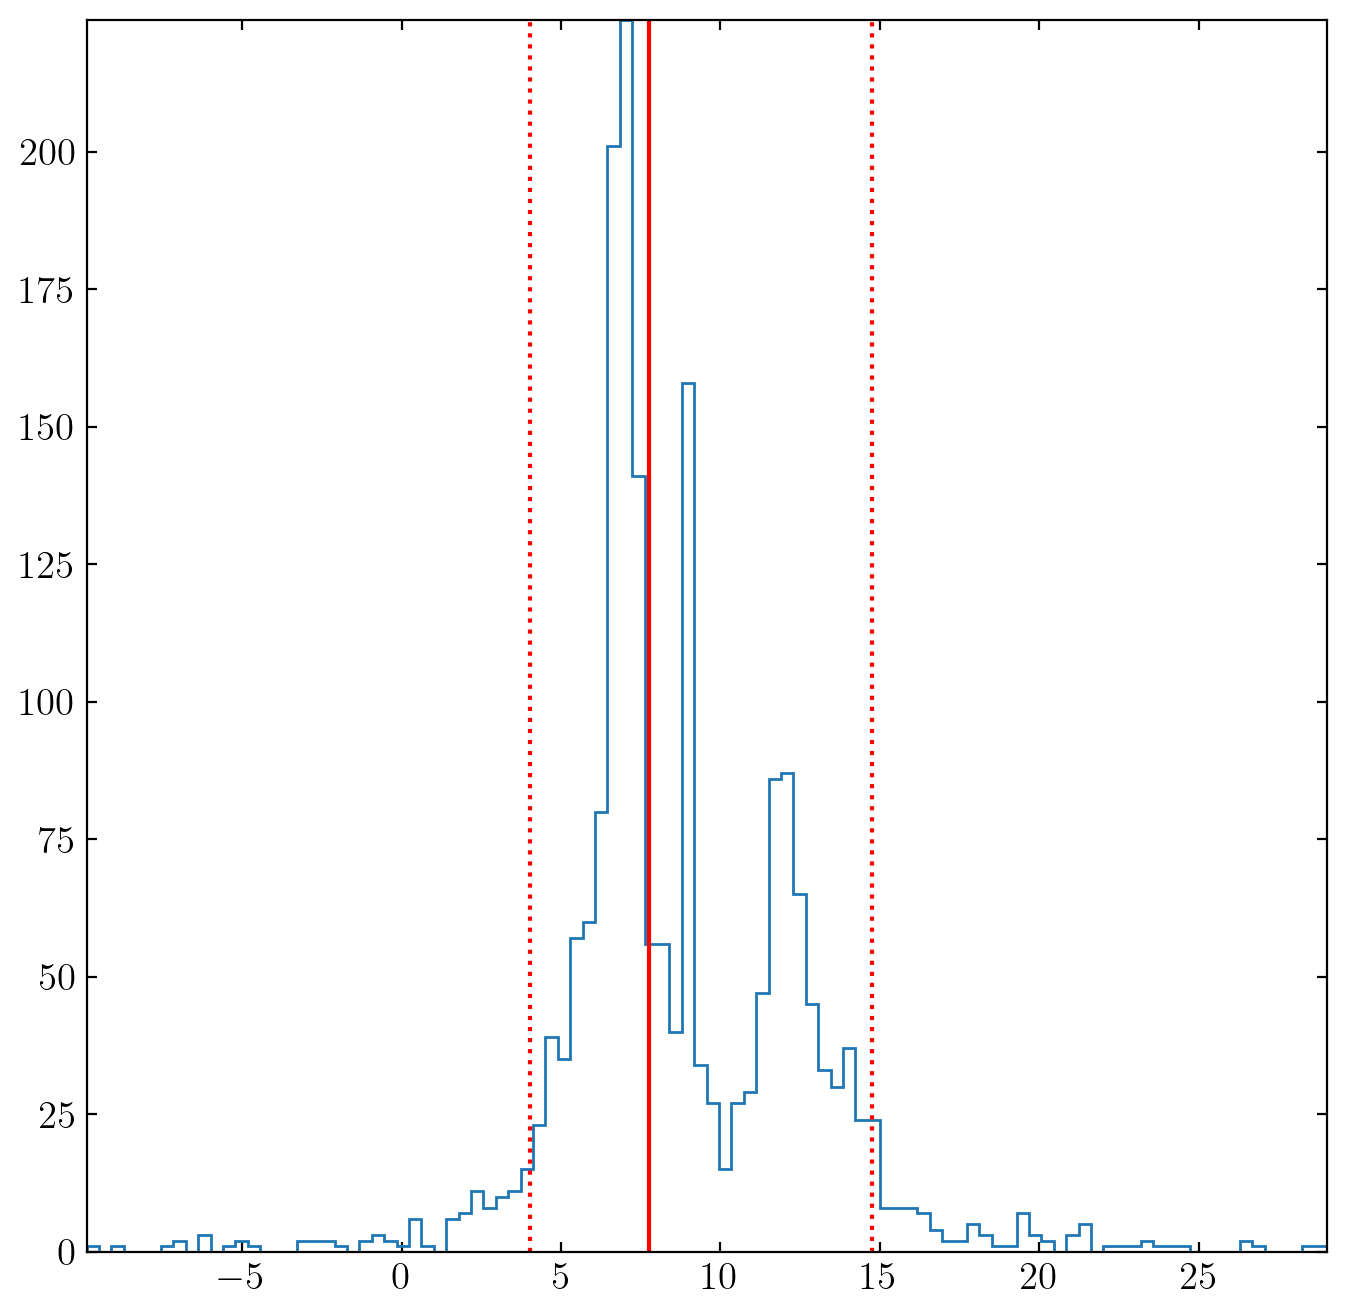

In [26]:
plt.hist(data,bins=100,histtype='step');

plt.axvline(np.percentile(data,50),c='red')
plt.axvline(np.percentile(data,5),c='red',ls='dotted')
plt.axvline(np.percentile(data,95),c='red',ls='dotted')

The region between the 5th and the 95th percentile contains 90% of the samples. In Bayesian statistics, this is the 90% credible interval.

The **interquartile range** is the difference between the 25th and 75th percentiles, $q_{75} - q_{25}$. You can quantify the spread of the distribution by using the interquantile range. Thus, instead of claiming that the distribuion has a mean and a variance, I can say that it has a median and that 50% of the samples are in between $q_{25}$ and $q_{75}$.

Just as with the median, the interquartile range is a more *robust* estimator of the scale of a distribution than the standard deviation.  So, one can create a standard-deviation-esque measurement (at least for a Gaussian) from a normalized interquartile range as

$$ \sigma_G = 0.7413\times(q_{75} - q_{25}) $$  

The normalization makes it *unbiased* for a perfect Gaussian (more on that later) so that if applied to a Gaussian distribution you get $ \sigma_G = \sigma_{Gaussian} $

In [27]:
# Execute this cell. Think about and discuss the results.
from astroML import stats as astroMLstats

# original data
print(astroMLstats.sigmaG(data), np.std(data))

# corrupted by outliers
print(astroMLstats.sigmaG(data2), np.std(data2))

3.678746989540611 3.876345281287555
3.678746989540611 1074.8871753069159


Notice that $\sigma_G$ is not affected by the presence of outliers because it relies on ordering the samples while the standard deviation are different 

In [28]:
# Execute this cell. Cumulative statistics take longer to compute because you need to sort the array first, but are more robust.
%timeit np.mean(data), np.std(data)
%timeit np.median(data), astroMLstats.sigmaG(data)

47.9 µs ± 1.31 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
258 µs ± 7.67 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


The **mode** is the most probable value, determined from the peak of the distribution, which is the value where the derivative is 0 (i.e. the turning point):

$$ \left(\frac{dh(x)}{dx}\right)_{x_m} = 0$$

A good approximation for the mode is (the distribution needs to be somewhat close to Gaussian, for a proof: [Lupton 1993](https://press.princeton.edu/books/hardcover/9780691074290/statistics-in-theory-and-practice))

$$x_m = 3q_{50} - 2\mu$$



In [29]:
# Execute this cell
mode = 3*q50 - 2*mean
print(mode, mean, median)

# Note: don't rely on scipy.stats.mode()!!
# It gives the most common value of an array, 
# but we have a random sample of unique draws
print(scipy.stats.mode(data,keepdims=False), "This is non sense!")

5.668374641327581 8.79491032639886 7.752731764708434
ModeResult(mode=-9.890167554081575, count=1) This is non sense!


Other useful ***shape*** measures include the "higher order" moments (the **skewness** and **kurtosis**) that measure tha asymmetry of the distribution:

$$\mathbf{Skewness}\quad\quad \Sigma = \int_{-\infty}^{\infty}  \left(\frac{x-\mu}{\sigma}\right)^3 h(x) dx,$$
 
$$\mathbf{Kurtosis}\quad\quad K = \int_{-\infty}^{\infty}  \left(\frac{x-\mu}{\sigma}\right)^4 h(x) dx  - 3.$$

The skewness measures the distribution's *asymmetry*. Distribution's with long tails to larger $x$ values have positive $\Sigma$. 

The kurtosis measures how peaked or flat-topped a distribution is, with strongly peaked ones being positive and flat-topped ones being negative. $K$ is calibrated to a Gaussian distribution (hence the subtraction of $3$).

![https://www.astroml.org/_images/fig_kurtosis_skew_1.png](https://www.astroml.org/_images/fig_kurtosis_skew_1.png)

In [30]:
skew = scipy.stats.skew(data)
kurt = scipy.stats.kurtosis(data)
print(skew, kurt)

0.45629831452598996 3.24867718616583


In [31]:
# Summary descriptive statistics for our distribution
print("Location: ", mean, median, mode)
print("Scale: ", var, std, astroMLstats.sigmaG(data))
print("Shape: ", skew, kurt)
print("Some percentiles: ", q25, q50, q75)

Location:  8.79491032639886 7.752731764708434 5.668374641327581
Scale:  15.026052739760294 3.876345281287555 3.678746989540611
Shape:  0.45629831452598996 3.24867718616583
Some percentiles:  6.674995612577169 7.752731764708434 11.637549888596837


## Sample versus Population statistics <a class="anchor" id="two"></a>

Statistics estimated from the *data* are called **sample statistics** as compared to **population statistics** derived from knowing the functional form of the pdf and it's unlikely that you can know the latter.

Specifically, $\mu$ is the **population mean**, i.e., it is the expectation value of $x$ for $h(x)$.  But we don't *know* $h(x)$.  So the **sample mean**, $\overline{x}$, is an ***estimator*** of $\mu$, defined as

$$\overline{x} \equiv \frac{1}{N}\sum_{i=1}^N x_i,$$

which we determine from the data itself.

Instead of the **population variance** $\sigma^2$, we have the **sample variance**, $s^2$, where

$$s^2 = \frac{1}{N-1}\sum_{i=1}^N(x_i-\overline{x})^2$$

The $N-1$ denominator (instead of $N$) accounts for the fact that we determine $\overline{x}$ from the data itself instead of using a known $\mu$. This is called [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).

Ideally one tries to work in a regime where $N$ is large enough that we can be lazy and ignore this. 

So the mean and variance of a distribution are $\mu$ and $\sigma^2$.  The *estimators* of the distribution are $\overline{x}$ (or $\hat{x}$) and $s^2$.

**From my own research.** We computed Bessel's correction in the context of Hierarchical Bayesian statistics in a recent paper. [Moore and Gerosa (2021), "Population-informed priors in gravitational-wave astronomy"](https://arxiv.org/abs/2108.02462). It's a fun paper to read if you're interested in the stats+gravity interplay and want to learn about probabilistic graphical models (which I wont'thave time to cover in this class).

### Uncertainty of sample statistics

We would also like to know the uncertainty of our estimates $\overline{x}$ and $s$. 

Note that $s$ is the width estimate of the underlying distribution; it is **NOT** the uncertainty of $\overline{x}$. This is a common misconception. There is a common misconception that says that the $\sigma$ is the error on the $\mu$: i.e the stars have a mean temperature of 10 $\pm$ 1 where 1 is the sigma of the distribution. This is wrong. The $\sigma$ tells how spread the distribution is and does not tell the precision of the estimate of the mean.

Rather the uncertainty of $\overline{x}$, is $\sigma_{\overline{x}}$:

$$ \sigma_{\overline{x}} = \frac{s}{\sqrt{N}},$$

which we call the **standard error of the mean**. Collecting more data, reduces the error on the mean.

The uncertainty of $s$ itself is is $\sigma_s$:

$$\sigma_s = \frac{s}{\sqrt{2(N-1)}} = \frac{1}{\sqrt{2}}\sqrt{\frac{N}{N-1}}\sigma_{\overline{x}}.$$

Note that for large $N$, $\sigma_{\overline{x}} \sim \sqrt{2}\sigma_s$ and for small $N$, $\sigma_s$ is not much smaller than $s$.

Another useful uncertainty estimate is for computing quantiles. The **standard error of a quantile** is

$$ \sigma_{q_p} = \frac{1}{h_p}\sqrt{\frac{p(1-p)}{N}}$$

where $p$ is between $0$ and $1$ and $h_p = h(p)$ so that $p$ is the value of $x$ and fot the 90% quantile $h_p=0.9$

Note that all the quantities scale as $\sqrt{N}$ and this is due to the central limit theorem

***Try this at home***. 
- Generate some data
- Compute $\bar x$ and $s$
- Do it many times
- Estimate the errors
- Compare with the expressions above

## Univariate distributions  (and an intro to scipy.stats)

If we are attempting to characterize our data in a way that is **parameterized**, then we need a functional form for a **distribution**.  There are many naturally occurring distributions.  The book goes through quite a few of them.  Here we'll just talk about a few basic ones to get us started.

### Uniform Distribution

The uniform distribution is perhaps more commonly called a "top-hat" or a "box" distribution.  It is specified by a mean, $\mu$ (where the box is centered), and a width, $W$, where

$$p(x|\mu,W) = \frac{1}{W}$$

over the range $|x-\mu|\le \frac{W}{2}$ and $0$ otherwise.  That says that "given $\mu$ AND $W$, the probability of $x$ is $\frac{1}{W}$" (as long as we are within a certain range). The factor $1/W$ is for normalization to $1$.

Since we are used to thinking of a Gaussian as the *only* type of distribution the concept of $\sigma$ (aside from the width) may seem strange.  But $\sigma$ as mathematically defined above applies here and
$$\sigma = \frac{W}{\sqrt{12}}.$$


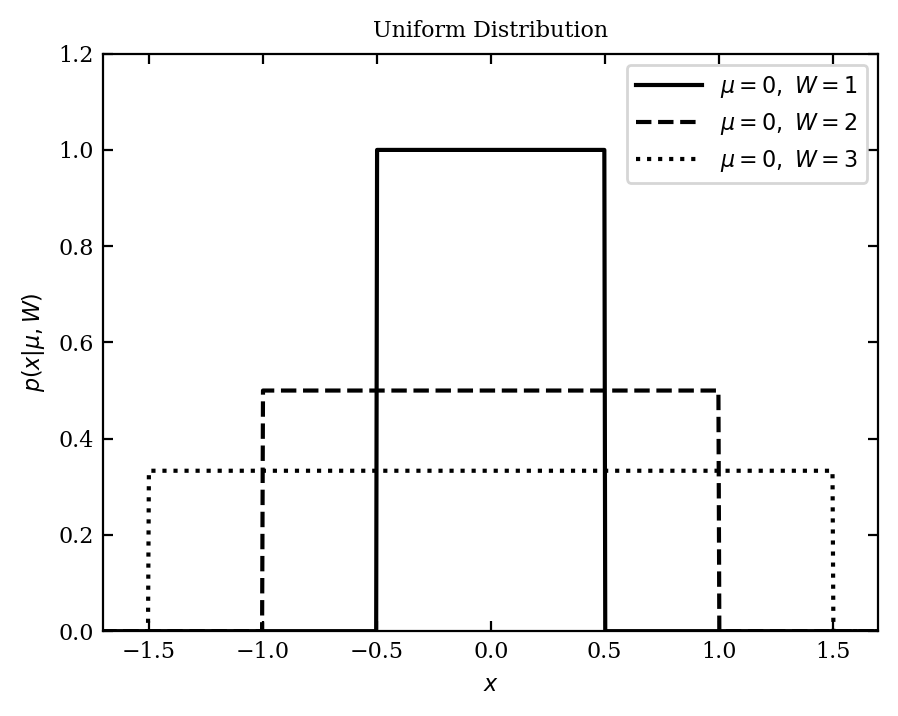

In [32]:
"""
Example of a uniform distribution
---------------------------------
Figure 3.7.
This shows an example of a uniform distribution with various parameters.
We'll generate the distribution using::
    dist = scipy.stats.uniform(...)
Where ... should be filled in with the desired distribution parameters
Once we have defined the distribution parameters in this way, these
distribution objects have many useful methods; for example:
* ``dist.pmf(x)`` computes the Probability Mass Function at values ``x``
  in the case of discrete distributions
* ``dist.pdf(x)`` computes the Probability Density Function at values ``x``
  in the case of continuous distributions
* ``dist.rvs(N)`` computes ``N`` random variables distributed according
  to the given distribution
Many further options exist; refer to the documentation of ``scipy.stats``
for more details.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import uniform
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Define the distribution parameters to be plotted
W_values = [1.0, 2.0, 3.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-2, 2, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))

for W, ls in zip(W_values, linestyles):
    left = mu - 0.5 * W
    dist = uniform(left, W)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\mu=%i,\ W=%i$' % (mu, W))

plt.xlim(-1.7, 1.7)
plt.ylim(0, 1.2)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu, W)$')
plt.title('Uniform Distribution')

plt.legend()
plt.show()

We can implement [uniform](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform) in `scipy` as follows.  We'll use the methods listed at the bottom of the link to complete the cell: `dist.rvs(size=N)` which produces `N` random draws from the distribution and `dist.pdf(x)` which returns the value of the pdf at a given $x$. Lots of distributions can be accessed and used in a similar way.  

Create a uniform distribution with parameters `loc=0`,  `scale=2`, and `N=10`.

In [33]:
N = 10
distU = scipy.stats.uniform(0,2)
draws = distU.rvs(N) # ten random draws
print(draws)

p = distU.cdf(1) # pdf evaluated at x=1

print(p)

[0.62985757 1.02980098 0.62000486 1.54160413 1.417549   1.43708915
 1.278921   1.22730088 1.23553492 1.26190778]
0.5


In [34]:
distU

In [35]:
p = distU.pdf(1) # pdf evaluated at x=1
p

0.5

### Gaussian Distribution

As many of you know, the Gaussian distribution pdf is given by

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$

It is also called the **normal distribution** and can be noted by $\mathscr{N}(\mu,\sigma)$.


We love using Gaussians in physics and astronomy because they can approximate many distributions and are also super easy to work with. **The convolution of two Gaussians results in a Gaussian.**  So $\mathscr{N}(\mu_1,\sigma_1)$ convolved with $\mathscr{N}(\mu_2,\sigma_2)$ is $\mathscr{N}(\mu_1+\mu_2,\sqrt{\sigma_1^2+\sigma_2^2})$.

In addition, every single higher moment of the distribution is uniquely determined by $\mu$ and $\sigma$

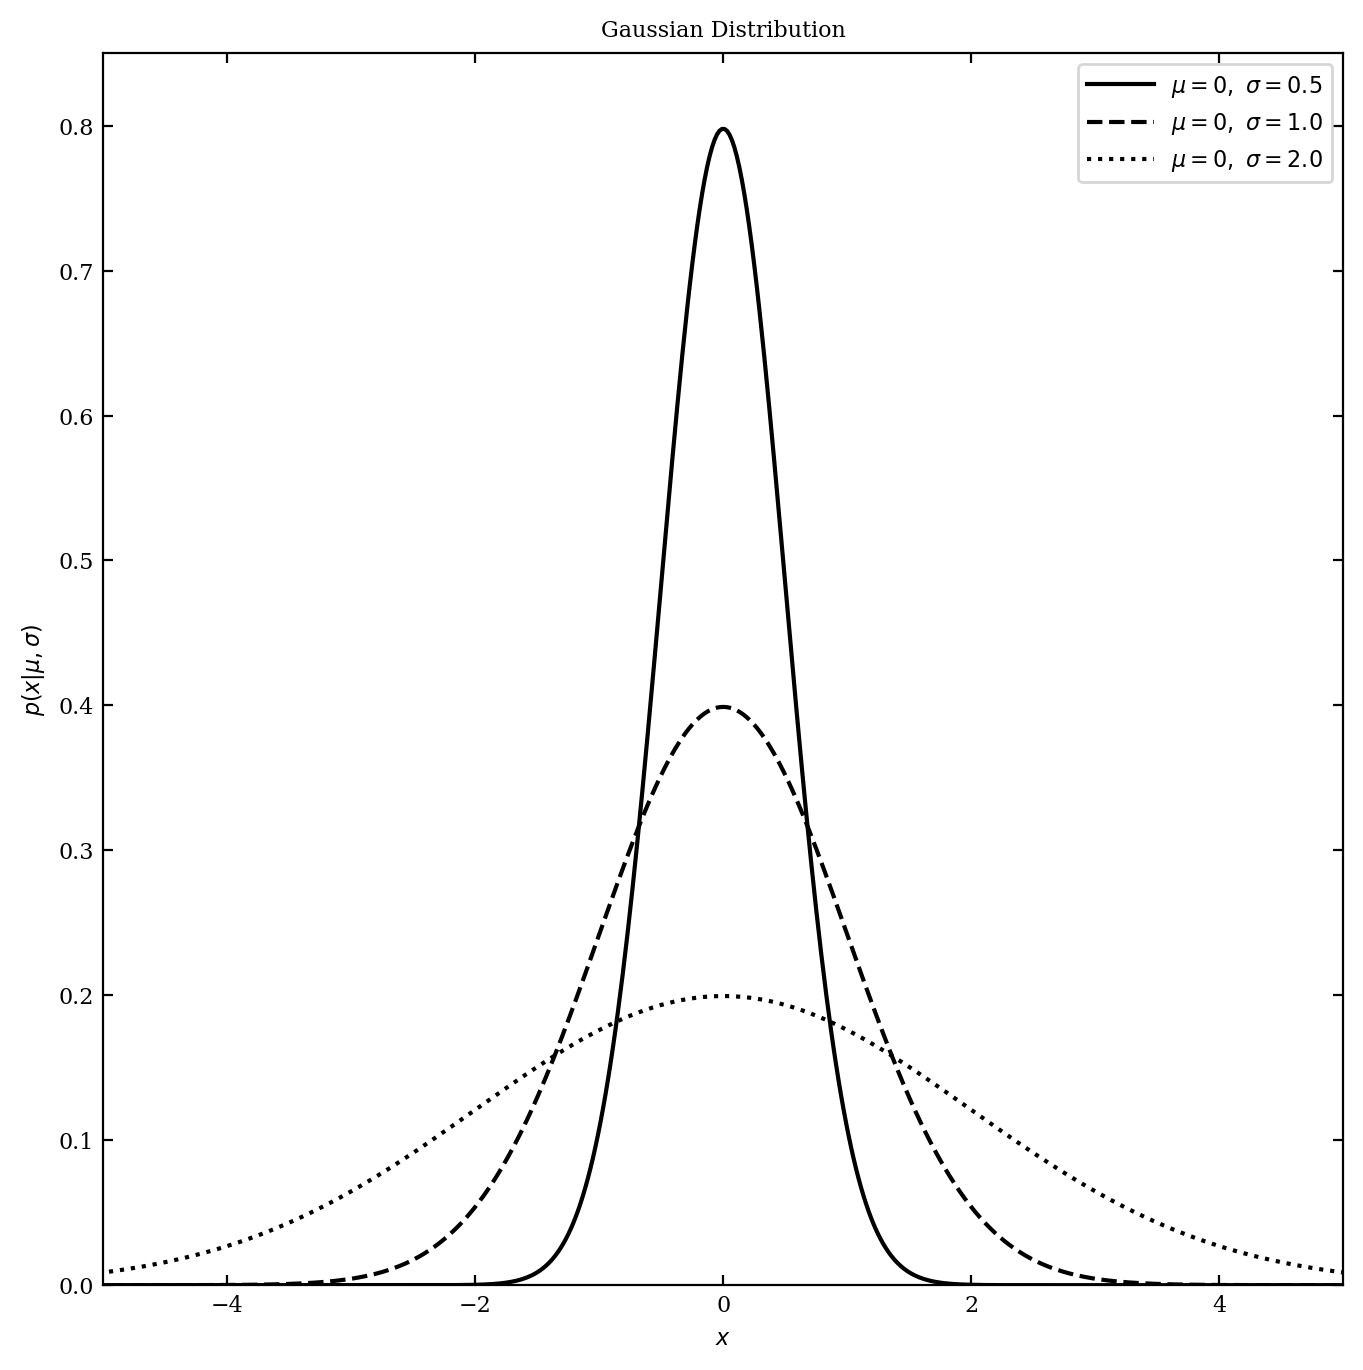

In [36]:
"""
Example of a Gaussian distribution
----------------------------------
Figure 3.8.
This shows an example of a gaussian distribution with various parameters.
We'll generate the distribution using::
    dist = scipy.stats.norm(...)
Where ... should be filled in with the desired distribution parameters
Once we have defined the distribution parameters in this way, these
distribution objects have many useful methods; for example:
* ``dist.pmf(x)`` computes the Probability Mass Function at values ``x``
  in the case of discrete distributions
* ``dist.pdf(x)`` computes the Probability Density Function at values ``x``
  in the case of continuous distributions
* ``dist.rvs(N)`` computes ``N`` random variables distributed according
  to the given distribution
Many further options exist; refer to the documentation of ``scipy.stats``
for more details.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Define the distributions to be plotted
sigma_values = [0.5, 1.0, 2.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-10, 10, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(8,8))

for sigma, ls in zip(sigma_values, linestyles):
    # create a gaussian / normal distribution
    dist = norm(mu, sigma)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sigma))

plt.xlim(-5, 5)
plt.ylim(0, 0.85)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')

plt.legend()
plt.show()

In [37]:
distG = scipy.stats.norm(loc =100 , scale=15) # Normal distribution with mean = 100, stdev = 15
draws = distG.rvs(1000) # 10 random draws
p = distG.pdf(45) # pdf evaluated at x=0

print(draws)
print(p)

[101.25749552 101.60269619 107.16631666 114.13720992  85.39608125
 124.35789409  85.85148794  99.89832687 122.77794834 104.68979345
 106.58887504 104.56018294 128.4192621  128.72135473 105.23107985
  91.36661183 101.69697692  64.51471    125.61700788 107.35536586
  85.28145308  79.80939481 101.34068276 122.64332787 111.33829304
  89.33379299 106.69510308 129.72399478  84.741773   125.89807939
  91.15370063 125.90361549 101.5465194  118.06196939 103.48481612
  78.93034149  98.76363732  86.02700446  91.83456174  89.89993888
 121.09275599  70.57449744  83.92180903  81.63693307 101.04337566
  87.92126829  96.17338577  91.02738097  94.36212425 118.82880194
  88.77377893 109.67192647 106.91265305 116.13625583  83.08180713
  99.87521423  95.0109609   84.80242998  88.85502869 125.57535577
 106.7490782   99.44892323  91.45124619 104.77047184 100.21187141
 107.60540486  69.19516216  85.14465875  73.05196394  88.22329322
 104.67176117 108.7505947   88.8374361   81.75894424 110.35067483
 104.81425

(array([  8.,  31.,  68., 150., 198., 201., 172., 100.,  53.,  19.]),
 array([ 56.49947427,  64.83252246,  73.16557064,  81.49861882,
         89.83166701,  98.16471519, 106.49776338, 114.83081156,
        123.16385975, 131.49690793, 139.82995612]),
 <BarContainer object of 10 artists>)

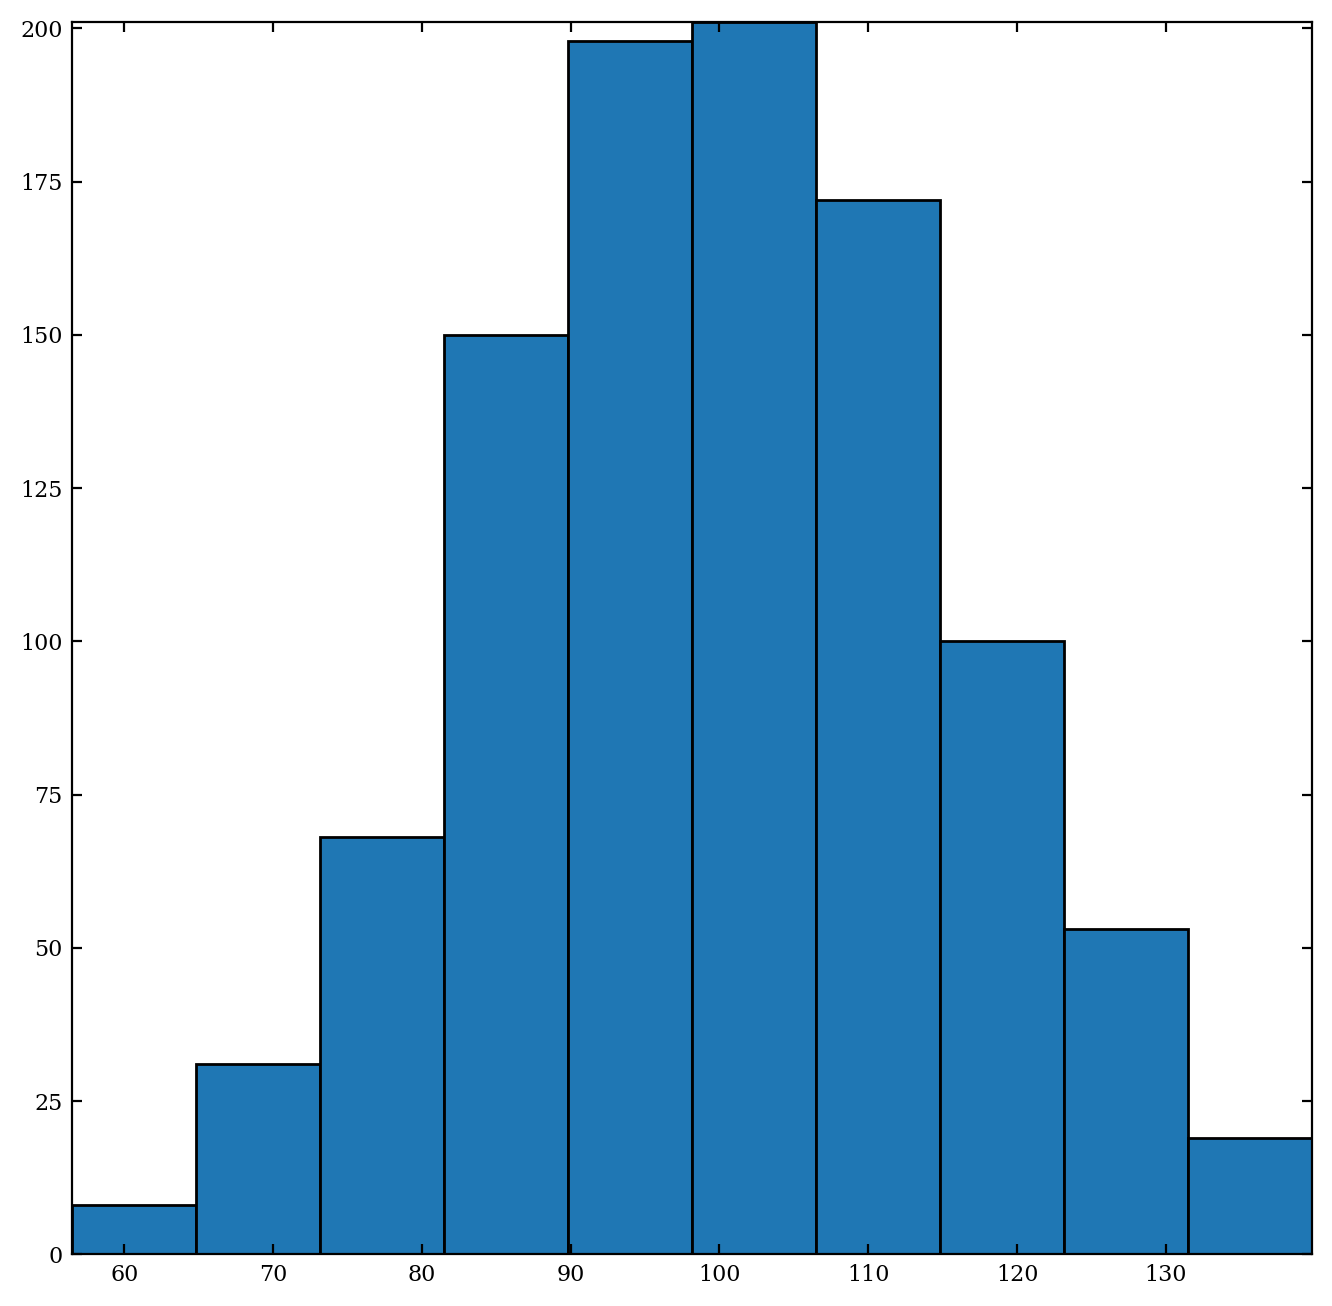

In [38]:
plt.hist(draws)

The cumulative distribution function of the Gaussian distribution is the $Err$ function. Remind that $cdf$ is the integral of the pdf from $x'=-\infty$ to $x'=x$:

$$\mathrm{cdf}(x|\mu,\sigma) = \int_{-\infty}^{x'} p(x'|\mu,\sigma) dx',$$

where $\mathrm{cdf}(\infty) = 1$. 

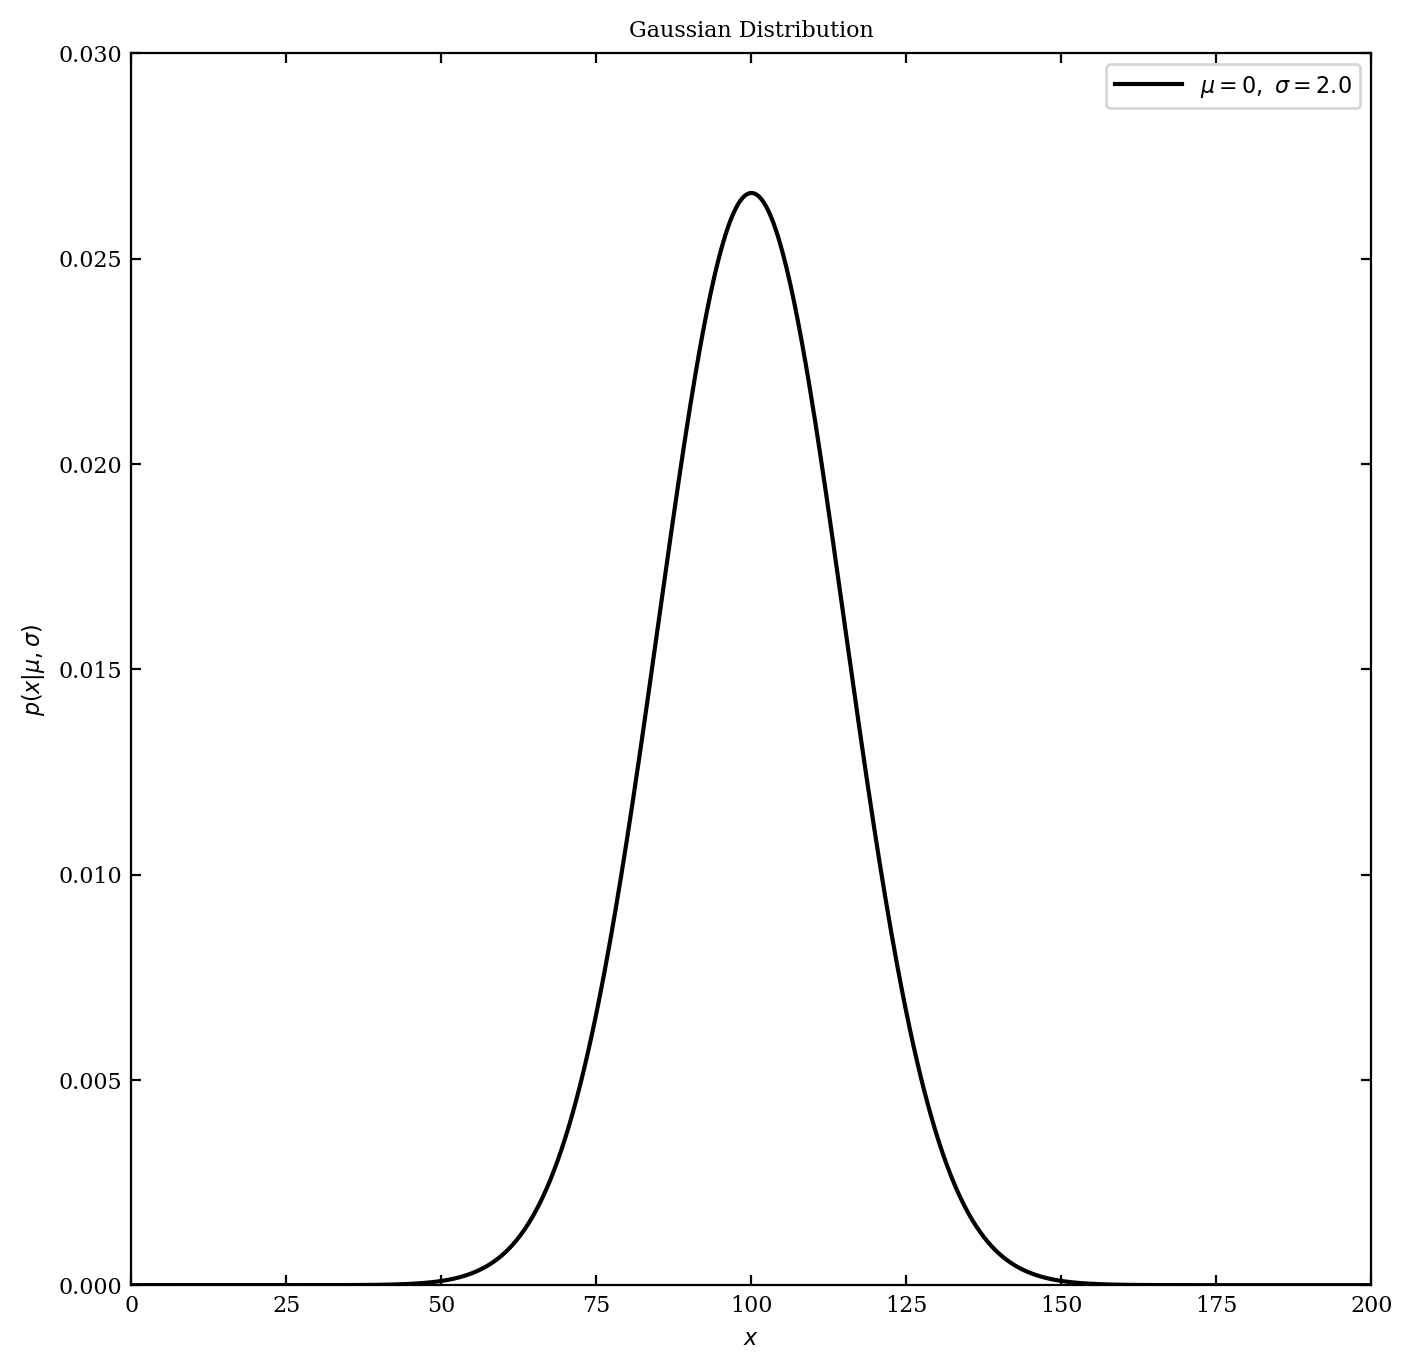

In [39]:
## Let's play with Gaussians! Or Normal distributions, N(mu,sigma)

xgrid = np.linspace(-100,200,1000) # generate distribution for a uniform grid of x values
gaussPDF = distG.pdf(xgrid)  # this is a function of xgrid

# actual plotting
fig, ax = plt.subplots(figsize=(8,8))

# Python3 f strings are awesome!
plt.plot(xgrid, gaussPDF, ls='-', c='black', 
         label=f'$\mu={mu},\ \sigma={sigma}$')
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend();

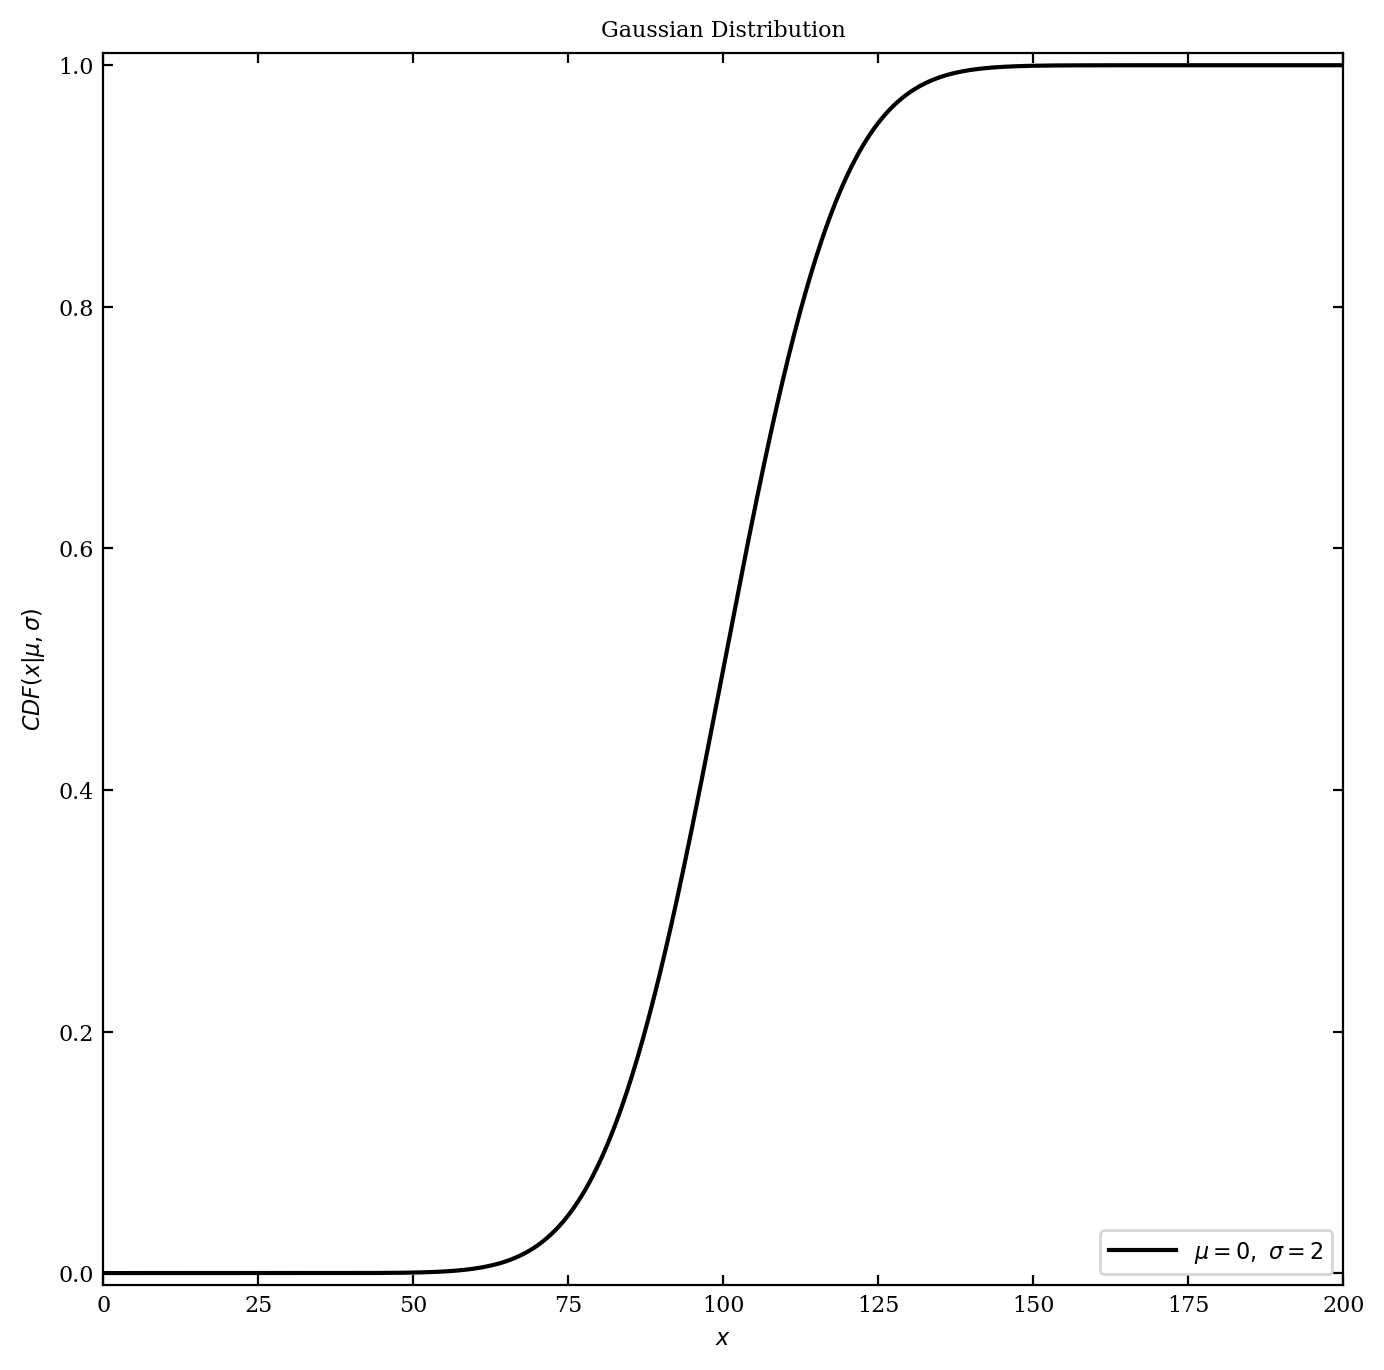

In [40]:
# The same as above but now with the cdf method
gaussCDF = distG.cdf(xgrid)
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(xgrid, gaussCDF, ls='-', c='black', 
         label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))
plt.xlim(0, 200)
plt.ylim(-0.01, 1.01)
plt.xlabel('$x$')
plt.ylabel(r'$CDF(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend(loc=4)

#### Gaussian confidence levels

The probability of a measurement drawn from a Gaussian distribution that is between $\mu-a$ and $\mu+b$ is obtained by evaluating the $Err$ function:

$$\int_{\mu-a}^{\mu+b} p(x|\mu,\sigma) dx.$$

- For $a=b=1\sigma$, we get the familar result of 68.3%.  
- For $a=b=2\sigma$ it is 95.4%.  
- For $a=b=3\sigma$ it is 99.7%. 

So we refer to the range $\mu \pm 1\sigma$, $\mu \pm 2\sigma$, and $\mu \pm 3\sigma$ as the 68%, 95%, and 99.7% **confidence limits**, respectively. Note that if your distribution is not Gaussian, then these confidence intervals will be different!

***We often still refer to uncertainty regions of distributions as $1\sigma$ or $2\sigma$ regions, which for non-Gaussian distributions usually means (for $1\sigma$) the region enclosing the $16\%$ and $84\%$ quantiles.***

In [42]:
# +15 and - 15  because we set scale = 15 above
# distG = scipy.stats.norm(loc =100 , scale=15) # Normal distribution with mean = 100, stdev = 15
upper = distG.cdf(100+15) 
lower = distG.cdf(100-15)
p = upper-lower
print(p) # is exatly the 68% that we just saw

0.6826894921370859


What is the probability enclosed between $-2\sigma$ and $+4\sigma$? (*Verify first that you get the correct answer for the bullet points above!*)

In [51]:
upper = distG.cdf(100+4*15)
lower = distG.cdf(100-2*15)
p = upper-lower
print(p)

0.9772181968099877


**A $5\sigma$ discovery:** In physics (expecially [particle physics](https://cerncourier.com/a/five-sigma-revisited/)) the traditional criterion for claiming discovery of something new is often "$5\sigma$". The upper tail of a Gaussian distribution above $\mu+5\sigma$ has area of $3\times 10^{-7}$. But this of course relies on a Gaussian distribution; real life is never perfectly Gaussian. So a $5\sigma$-discovery means *"there is 1 chance in $\sim 10^{7}$ that the instrumental noise can fluctute so much to generate the signal I'm seeing"*.   (more [in this paper](https://arxiv.org/pdf/1310.1284))


### Log Normal

Note that if $x$ is Gaussian distributed with $\mathscr{N}(\mu,\sigma)$, then $y=\exp(x)$ will have a **log-normal** distribution, where the mean of y is $\exp(\mu + \sigma^2/2)$, the median is $\exp(\mu)$, and the mode is $\exp(\mu-\sigma^2)$.  Try it.

In [38]:
# Execute this cell
x = scipy.stats.norm(0,1) # mean = 0, stdev = 1
y = np.exp(x.rvs(100))

print(y.mean())

1.5727346811739062


In [54]:
? scipy.stats.norm

In [39]:
distLN = scipy.stats.norm(0,1) # mean = 0, stdev = 1
x = distLN.rvs(10000)
y = np.exp(x)

print(np.exp(0 + 0.5*1), y.mean())

1.6487212707001282 1.6532980553064518


### $\chi^2$ Distribution

We'll run into the $\chi^2$ distribution when we talk about Maximum Likelihood in the next lecture.

If we have a Gaussian distribution with values ${x_i}$ and we scale and normalize them according to (this operation is called **standard scaling**)
$$z_i = \frac{x_i-\mu}{\sigma},$$
then the sum of squares, $Q$ 
$$Q = \sum_{i=1}^N z_i^2,$$
will follow the $\chi^2$ distribution.  The *number of degrees of freedom*, $k$ is given by the number of data points, $N$ (minus any constraints).  The pdf of $Q$ given $k$ defines $\chi^2$ and is given by
$$p(Q|k)\equiv \chi^2(Q|k) = \frac{1}{2^{k/2}\Gamma(k/2)}Q^{k/2-1}\exp(-Q/2),$$
where $Q>0$ and the $\Gamma$ function would just be the usual factorial function if we were dealing with integers, but here we have half integers.

This is ugly, but it is really just a formula like anything else.  Note that the shape of the distribution *only* depends on the sample size $N=k$ and not on $\mu$ or $\sigma$.  

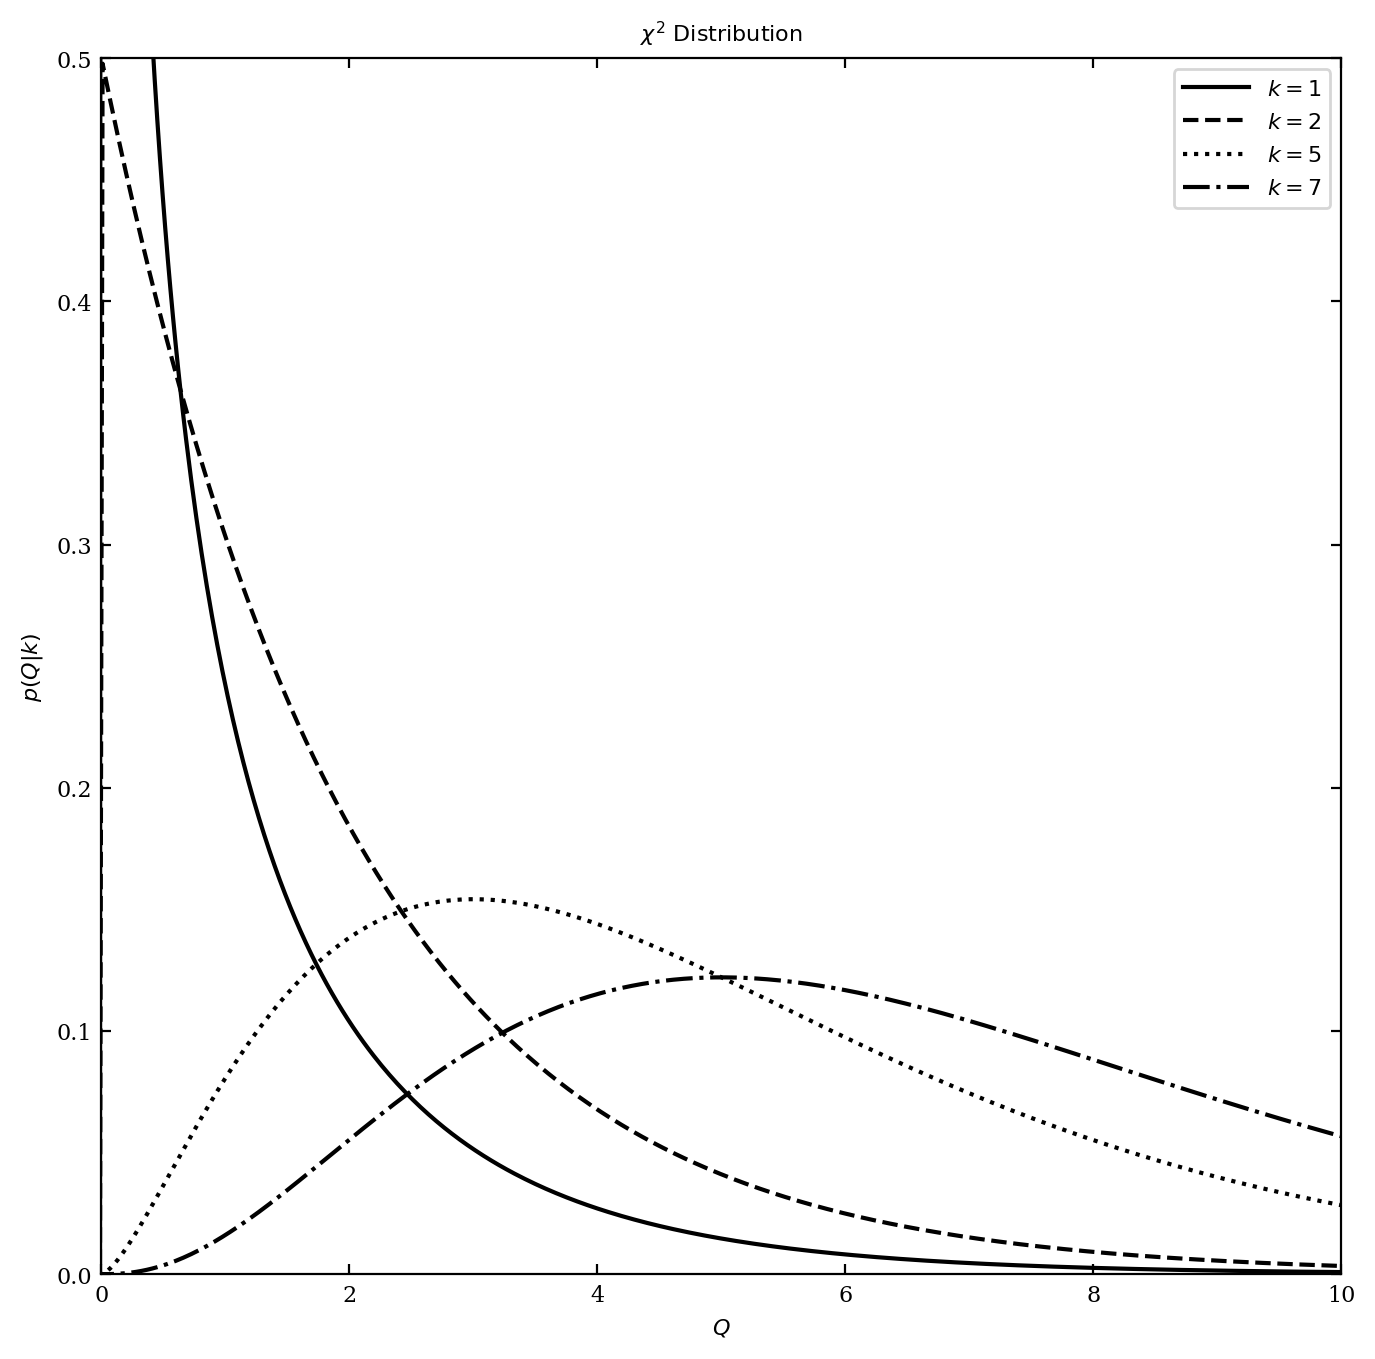

In [40]:
r"""
Example of a chi-squared distribution
---------------------------------------
Figure 3.14.
This shows an example of a :math:`\chi^2` distribution with various parameters.
We'll generate the distribution using::
    dist = scipy.stats.chi2(...)
Where ... should be filled in with the desired distribution parameters
Once we have defined the distribution parameters in this way, these
distribution objects have many useful methods; for example:
* ``dist.pmf(x)`` computes the Probability Mass Function at values ``x``
  in the case of discrete distributions
* ``dist.pdf(x)`` computes the Probability Density Function at values ``x``
  in the case of continuous distributions
* ``dist.rvs(N)`` computes ``N`` random variables distributed according
  to the given distribution
Many further options exist; refer to the documentation of ``scipy.stats``
for more details.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import chi2
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Define the distribution parameters to be plotted
k_values = [1, 2, 5, 7]
linestyles = ['-', '--', ':', '-.']
mu = 0
x = np.linspace(-1, 20, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.12)

for k, ls in zip(k_values, linestyles):
    dist = chi2(k, mu)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$k=%i$' % k)

plt.xlim(0, 10)
plt.ylim(0, 0.5)

plt.xlabel('$Q$')
plt.ylabel(r'$p(Q|k)$')
plt.title(r'$\chi^2\ \mathrm{Distribution}$')

plt.legend()
plt.show()

### Chi-squared per degree of freedom

In practice we frequently divide $\chi^2$ by the number of degrees of freedom ($N-1$), and work with:

$$\chi^2_\mathrm{dof} = \frac{1}{N-1} \sum_{i=1}^N \left(\frac{x_i-\overline{x}}{\sigma}\right)^2$$

so that the mean of this distribution becomes $1$.

This is useful because $\chi^2_\mathrm{dof}$ for large $k$, is distributed roughly as a Gaussian with $\mu=1$ and $\sigma=\sqrt{\frac{2}{N-1}}$

$$ p(\chi^2_\mathrm{dof}) \sim \mathscr{N}\left(1, \sqrt{\frac{2}{N-1}}\right) $$

(where $k = N-1$, and $N$ is the number of samples). Therefore, we expect $\chi^2_\mathrm{dof}$ to be 1, to within a few $\sqrt{\frac{2}{N-1}}$ which notably depends on the number of samples

### Poisson distribution

This is a distribution for a discrete variable, telling you the probability of $k$ events occuring within a certain time when the mean is $\mu$. 

$$ p(k|\mu) = \frac{\mu^k \exp(-\mu)}{k!} $$

where the mean $\mu$ completely characterizes the distribution. The mode is $(\mu-1)$, the standard deviation is $\sqrt{\mu}$, the skewness is $1/\sqrt{\mu}$, and the kurtosis is $1/\mu$.

As $\mu$ increases the Poisson distribution becomes more and more similar to a Gaussian with $\mathcal{N}(\mu,\sqrt{\mu})$. The Poisson distribution is sometimes called the ***law of small numbers*** or ***law of rare events***. Also, if you increase the data set, you collapse to a Gaussian.

Typically counting problems follow a Poisson distribution.

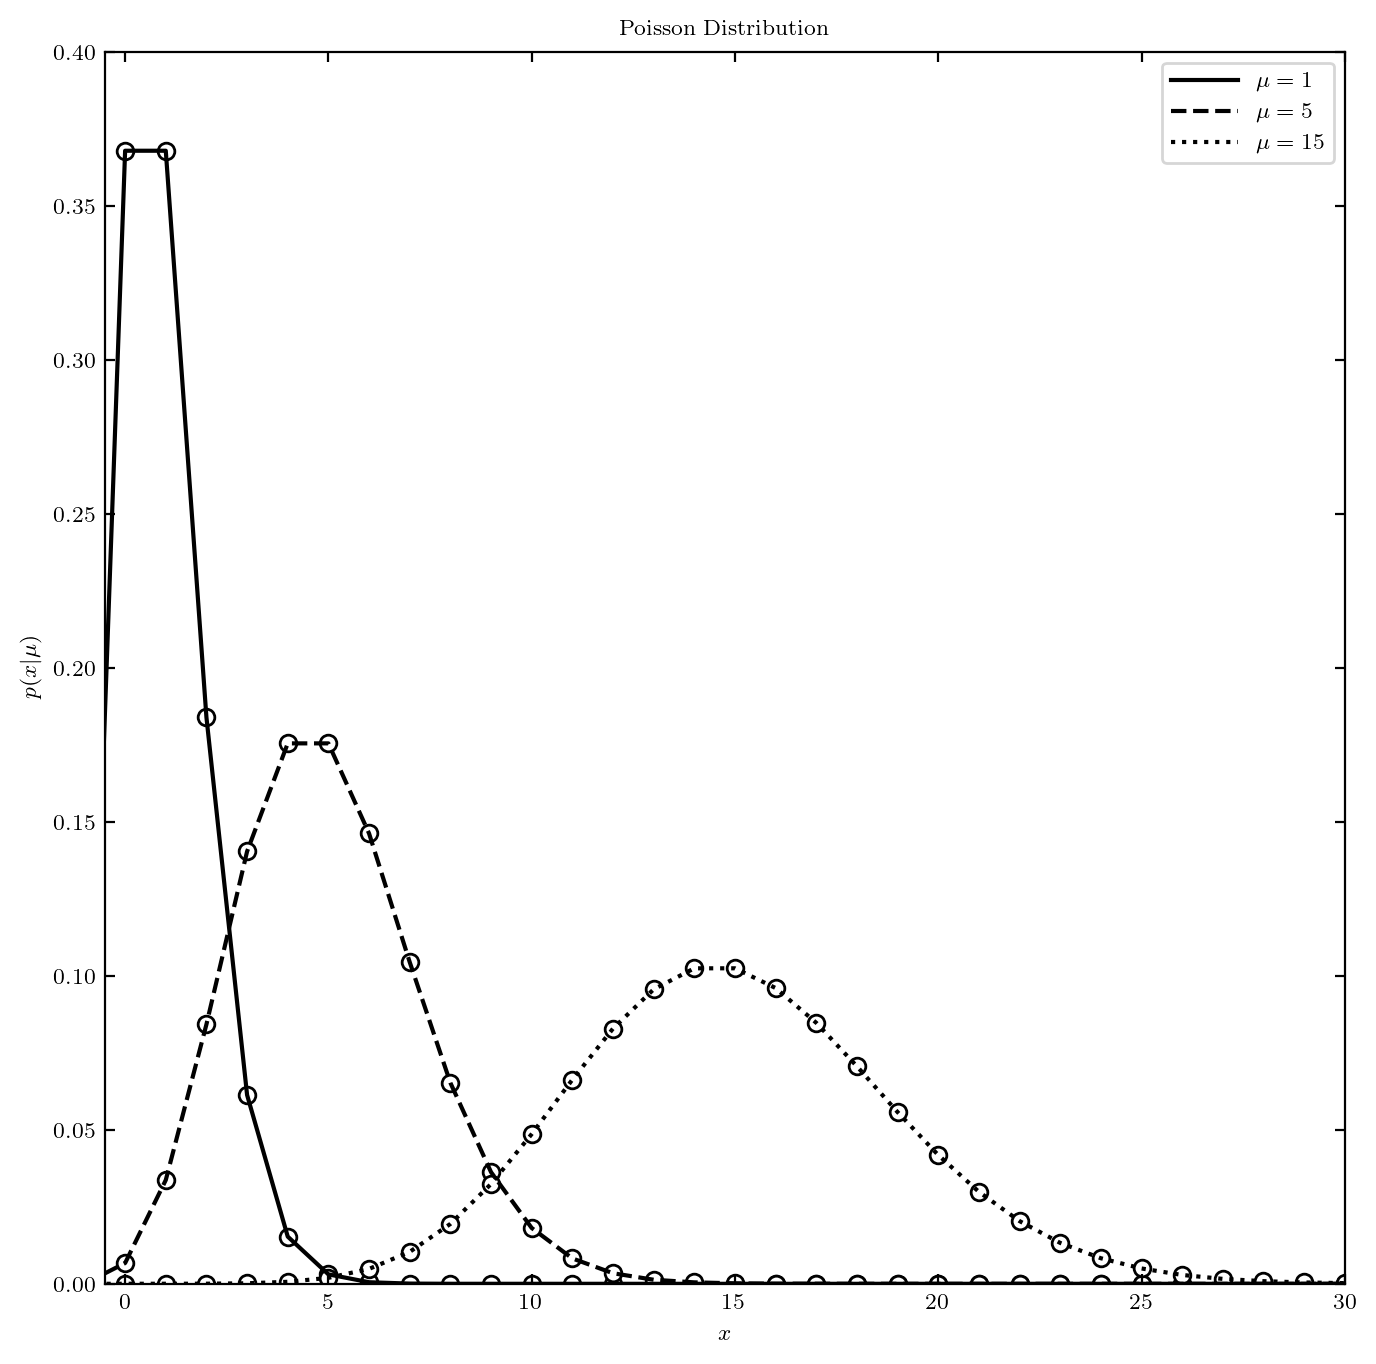

In [41]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import poisson
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Define the distribution parameters to be plotted
mu_values = [1, 5, 15]
linestyles = ['-', '--', ':']

#------------------------------------------------------------
# plot the distributions
#   we generate it using scipy.stats.poisson().  Once the distribution
#   object is created, we have many options: for example
#   - dist.pmf(x) evaluates the probability mass function in the case of
#     discrete distributions.
#   - dist.pdf(x) evaluates the probability density function for
#   evaluates
fig, ax = plt.subplots(figsize=(8,8))

for mu, ls in zip(mu_values, linestyles):
    # create a poisson distribution
    # we could generate a random sample from this distribution using, e.g.
    #   rand = dist.rvs(1000)
    dist = poisson(mu)
    x = np.arange(-1, 200)

    plt.plot(x, dist.pmf(x), color='black',
             linestyle=ls,
             label=r'$\mu=%i$' % mu)

    plt.scatter(x, dist.pmf(x), edgecolor='black',facecolor='white')
    
plt.xlim(-0.5, 30)
plt.ylim(0, 0.4)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu)$')
plt.title('Poisson Distribution')

plt.legend()
plt.show()

This is the distribution of [how popcorns pop](https://www.reddit.com/r/dataisbeautiful/comments/8uo1q9/popcorn_analytics_oc/)...   

### What's the point of all these distributions?

* ... and there are many many more "named" distributions, just look at [what's implemented](https://docs.scipy.org/doc/scipy/reference/stats.html) in scipy.stats! They almost never appear and, when they do, you can just look them up.  (I recently discovered something called "Marcum-Q distribution" when writing [this paper](https://arxiv.org/abs/2404.16930))
* Often sampling from standard distributions is useful to then sample from arbitrary complicated distribution
* The point is that we are going to make some measurements and then compute some estimators. But if you want to say how good the model is, you want to know the distribution of the estimator that is how unlikely it is that the estimator is so big or so small. 
* To understand the significance of our measurement, we want to know how likely it is that we would get that measurement in our experiment by random chance. 
* To determine that we need to know the shape of the distribution. Let's say that we find that $x=6$. If our data is $\chi^2$ distributed with 2 degrees of freedom, then we would integrate the $k=2$ curve above from 6 to $\infty$ to determine how likely it is that we would have gotten 6 or larger by chance.

Note that it is important that you decide *ahead of time* what the metric will be for deciding whether this result is significant or not.  More on this later, but see [this article](http://fivethirtyeight.com/features/science-isnt-broken/).

**FUN FACT:** [The Student's $t$ distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) is another famous one; it describes the distribution of the mean of a sample in the low-N regime. "Student" was the pen name of W. S. Gosset, who worked for the Guinness brewery in Dublin, Ireland. He was interested in the statistical analysis of small samples, e.g., the chemical properties of barley when the sample size might be as small as $3$.

![https://thatsmaths.files.wordpress.com/2014/04/gosset-plaque.jpg](https://thatsmaths.files.wordpress.com/2014/04/gosset-plaque.jpg)

## Time to get your hands dirty!

While in class, pick any of these two exercises. Or complete them both if you want to practice.  

For the exam, these are **optional (not examinable)**, both of them.

### 1. A nasty integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)


[My solution](https://github.com/dgerosa/astrostatistics_bicocca_2025/blob/main/solutions/S03_cubegaussian_horsekicks.ipynb) 

### 2. Kicking horses

A famous early  application of low-number statistics was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898.

He studied the distribution of 122 men kicked to death by horses among 10 Prussian army corps within 20 years (so a total number of corpes of 200). He recorded the number of corps with a given number of deaths:

| Number of deaths | Number of groups |
| --- | --- |
| 0 | 109 |
| 1 | 65 |
| 2 | 22 |
| 3 | 3 |
| 4 | 1 |

- Plot the resulting probability distribution. Careful with the normalization
- How does it look like? Again try to fit it by hand.

(Hint: think about sample mean and sample variance)


[My solution](https://github.com/dgerosa/astrostatistics_bicocca_2025/blob/main/solutions/S03_cubegaussian_horsekicks.ipynb)